In [3]:
import pandas as pd

In [7]:
df = pd.read_csv("dataset.csv")
df.rename(columns={'Real': 'Prediction', '40':'SpoofType', '41':'Illumination', '42':'Environment', '43':'Spoof'}, inplace=True)
# the prediction by silent face takes values 0-2. Gotta convert it.
df['Prediction'] = df['Prediction'].replace({0.0: 1, 1.0: 0, 2.0: 1})
df['Prediction'] = df['Prediction'].astype(int)
df.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,SpoofType,Illumination,Environment,Spoof,Prediction,Prediction Score
0,Data/test/6964/spoof/494405.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2,1,0,0.997231
1,Data/test/6407/spoof/494411.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,2,1,0,0.604510
2,Data/test/6153/spoof/494412.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,1,0.378704
3,Data/test/6411/live/494418.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.997799
4,Data/test/6336/spoof/494419.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0.954367
5,Data/test/5162/live/494421.png,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.654609
6,Data/test/6074/live/494424.png,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.989915
7,Data/test/7483/live/494428.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0.989566
8,Data/test/9735/spoof/494436.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,1,1,1,0.998543
9,Data/test/4943/live/494437.png,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.999986


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        26000 non-null  object 
 1   0                 26000 non-null  int64  
 2   1                 26000 non-null  int64  
 3   2                 26000 non-null  int64  
 4   3                 26000 non-null  int64  
 5   4                 26000 non-null  int64  
 6   5                 26000 non-null  int64  
 7   6                 26000 non-null  int64  
 8   7                 26000 non-null  int64  
 9   8                 26000 non-null  int64  
 10  9                 26000 non-null  int64  
 11  10                26000 non-null  int64  
 12  11                26000 non-null  int64  
 13  12                26000 non-null  int64  
 14  13                26000 non-null  int64  
 15  14                26000 non-null  int64  
 16  15                26000 non-null  int64 

In [9]:
import torch
from torchsummary import summary
from src.anti_spoof_predict import AntiSpoofPredict

model_path = "resources/anti_spoof_models/2.7_80x80_MiniFASNetV2.pth"
device_id = 0

model = AntiSpoofPredict(device_id)
model._load_model(model_path)

summary(model.model, input_size=(3, 80, 80))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 40, 40]             864
       BatchNorm2d-2           [-1, 32, 40, 40]              64
             PReLU-3           [-1, 32, 40, 40]              32
        Conv_block-4           [-1, 32, 40, 40]               0
            Conv2d-5           [-1, 32, 40, 40]             288
       BatchNorm2d-6           [-1, 32, 40, 40]              64
             PReLU-7           [-1, 32, 40, 40]              32
        Conv_block-8           [-1, 32, 40, 40]               0
            Conv2d-9          [-1, 103, 40, 40]           3,296
      BatchNorm2d-10          [-1, 103, 40, 40]             206
            PReLU-11          [-1, 103, 40, 40]             103
       Conv_block-12          [-1, 103, 40, 40]               0
           Conv2d-13          [-1, 103, 20, 20]             927
      BatchNorm2d-14          [-1, 103,

the embeddings are extracted after the operations performed by the self.conv_6_flatten layer, but before the operations performed by the self.bn, self.drop, and self.prob layers. the parser does it for all the images and stores the results in the embeddings.csv

from embeddings_parser import fill_embeddings_csv

fill_embeddings_csv()

In [14]:
embeddings = pd.read_csv("embeddings.csv", index_col=0)
embeddings.head()

,Embedding1,Embedding2,Embedding3
Data/test/6964/spoof/494405.png,-0.659332,0.746697,-0.087890
Data/test/6407/spoof/494411.png,-0.813476,0.468119,0.345139
Data/test/6153/spoof/494412.png,-0.811798,0.329260,0.482258
Data/test/6411/live/494418.png,-0.583216,0.786366,-0.203686
Data/test/6336/spoof/494419.png,0.122496,0.637546,-0.760611


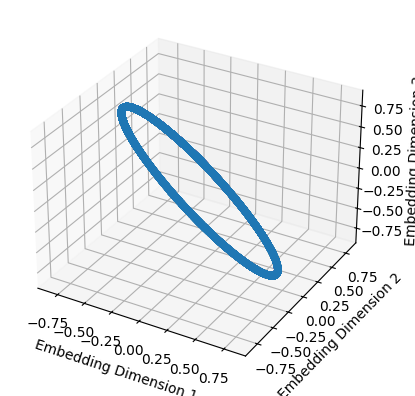

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x = embeddings['Embedding1'] 
y = embeddings['Embedding2'] 
z = embeddings['Embedding3'] 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

ax.set_xlabel('Embedding Dimension 1')
ax.set_ylabel('Embedding Dimension 2')
ax.set_zlabel('Embedding Dimension 3')

plt.show()